In [19]:
!pip install Augmentor

/home/parikshit.tomar/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/parikshit.tomar/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [12]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
path_to_train_directory='/home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train'
path_to_test_directory='/home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Test'
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

In [22]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [23]:
batch_size = 32
img_height = 180
img_width = 180

In [24]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [25]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [26]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes=len(class_names)
print(num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [29]:
path_to_training_dataset="/home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F050007CD30>: 100%|██████████| 500/500 [00:23<00:00, 20.96 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F05184A4220>:   0%|          | 1/500 [00:00<01:35,  5.22 Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F051855CB20>: 100%|██████████| 500/500 [00:30<00:00, 16.28 Samples/s]  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F051802E4F0>: 100%|██████████| 500/500 [00:26<00:00, 18.57 Samples/s]  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F05185DD0A0>:   0%|          | 1/500 [00:00<00:59,  8.35 Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F051859D610>: 100%|██████████| 500/500 [00:22<00:00, 21.91 Samples/s]                    
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F0518026070>:   0%|          | 1/500 [00:00<01:12,  6.85 Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F05182DE880>: 100%|██████████| 500/500 [00:29<00:00, 17.18 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F051830B280>:   0%|          | 2/500 [00:00<00:26, 18.92 Samples/s]          

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0518398400>: 100%|██████████| 500/500 [00:27<00:00, 18.30 Samples/s]                    
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F05182DE2B0>:   0%|          | 1/500 [00:00<00:31, 15.86 Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0518318AF0>: 100%|██████████| 500/500 [00:27<00:00, 18.42 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F050009FBE0>:   0%|          | 2/500 [00:00<00:31, 15.75 Samples/s]          

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F05182DE4F0>: 100%|██████████| 500/500 [00:27<00:00, 17.98 Samples/s]                    
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0500078C10>:   0%|          | 1/500 [00:00<01:33,  5.32 Samples/s]

Initialised with 2239 image(s) found.
Output directory set to /home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F05185B3E80>: 100%|██████████| 500/500 [00:31<00:00, 15.67 Samples/s]  


In [41]:
print(data_dir_train)

/home/parikshit.tomar/Desktop/Python/Upgrad/python/Resources/python-AI-LM/Upgrade/All Modules/5_Neural_Network/03_CNN_Assignmen/skin_cancer_ds/Train


In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


In [38]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

[]

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

[]

In [49]:
help(train_ds.take)

Help on method take in module tensorflow.python.data.ops.dataset_ops:

take(count) method of tensorflow.python.data.ops.dataset_ops.BatchDataset instance
    Creates a `Dataset` with at most `count` elements from this dataset.
    
    >>> dataset = tf.data.Dataset.range(10)
    >>> dataset = dataset.take(3)
    >>> list(dataset.as_numpy_iterator())
    [0, 1, 2]
    
    Args:
      count: A `tf.int64` scalar `tf.Tensor`, representing the number of
        elements of this dataset that should be taken to form the new dataset.
        If `count` is -1, or if `count` is greater than the size of this
        dataset, the new dataset will contain all elements of this dataset.
    
    Returns:
      Dataset: A `Dataset`.



In [53]:
print(train_ds.take(9))

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


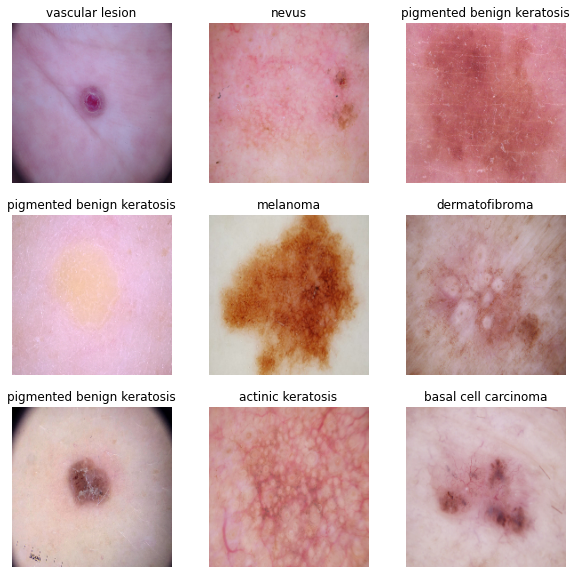

In [45]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))

for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')